<a href="https://colab.research.google.com/github/GitHub-Nishtha/COVID-19-Data-Analysis---Forecasting/blob/main/Covid_Data_Analysis_%26_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#for data manipulation
import pandas as pd
import numpy as np
#for data visualization
import seaborn as sns
#for data visualization
import matplotlib.pyplot as plt
#for plotting the data on World Map
import plotly.express as px

In [ ]:
data = pd.read_csv("/content/covid_19_data.csv")
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [ ]:
data = data.drop(["SNo","Last Update"],axis=1)

In [ ]:
data.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ObservationDate  306429 non-null  object 
 1   Province/State   228329 non-null  object 
 2   Country/Region   306429 non-null  object 
 3   Confirmed        306429 non-null  float64
 4   Deaths           306429 non-null  float64
 5   Recovered        306429 non-null  float64
dtypes: float64(3), object(3)
memory usage: 14.0+ MB


In [ ]:
#Change data from string to data-time type
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ObservationDate  306429 non-null  datetime64[ns]
 1   Province/State   228329 non-null  object        
 2   Country/Region   306429 non-null  object        
 3   Confirmed        306429 non-null  float64       
 4   Deaths           306429 non-null  float64       
 5   Recovered        306429 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 14.0+ MB


In [ ]:
data.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


In [ ]:
data['Active Cases'] = data['Confirmed'] - data['Deaths'] - data['Recovered']
data.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active Cases
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0,1.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0,14.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0,6.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0,1.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0,0.0


In [ ]:
#Fetch the latest data
latest_data = data[data["ObservationDate"]==data["ObservationDate"].max()]
latest_data

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active Cases
305664,2021-05-29,NaN,Afghanistan,70111.0,2899.0,57281.0,9931.0
305665,2021-05-29,NaN,Albania,132297.0,2449.0,129215.0,633.0
305666,2021-05-29,NaN,Algeria,128456.0,3460.0,89419.0,35577.0
305667,2021-05-29,NaN,Andorra,13693.0,127.0,13416.0,150.0
305668,2021-05-29,NaN,Angola,34180.0,757.0,27646.0,5777.0
...,...,...,...,...,...,...,...
306424,2021-05-29,Zaporizhia Oblast,Ukraine,102641.0,2335.0,95289.0,5017.0
306425,2021-05-29,Zeeland,Netherlands,29147.0,245.0,0.0,28902.0
306426,2021-05-29,Zhejiang,Mainland China,1364.0,1.0,1324.0,39.0
306427,2021-05-29,Zhytomyr Oblast,Ukraine,87550.0,1738.0,83790.0,2022.0


In [ ]:
earliest_data = data[data["ObservationDate"]==data["ObservationDate"].min()]
earliest_data

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active Cases
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0,1.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0,14.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0,6.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0,1.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0,0.0
5,2020-01-22,Guangdong,Mainland China,26.0,0.0,0.0,26.0
6,2020-01-22,Guangxi,Mainland China,2.0,0.0,0.0,2.0
7,2020-01-22,Guizhou,Mainland China,1.0,0.0,0.0,1.0
8,2020-01-22,Hainan,Mainland China,4.0,0.0,0.0,4.0
9,2020-01-22,Hebei,Mainland China,1.0,0.0,0.0,1.0


In [ ]:
len(latest_data)

765

In [ ]:
latest_data['Country/Region'].value_counts()

Russia                 83
US                     58
Japan                  49
India                  37
Colombia               34
                       ..
MS Zaandam              1
Mauritius               1
Trinidad and Tobago     1
Namibia                 1
Barbados                1
Name: Country/Region, Length: 195, dtype: int64

In [ ]:
#Using group_by we can get the total number of cases in a country
world = latest_data.groupby('Country/Region')["Confirmed","Deaths","Recovered","Active Cases"].sum()
world = world.reset_index()
world.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country/Region,Confirmed,Deaths,Recovered,Active Cases
0,Afghanistan,70111.0,2899.0,57281.0,9931.0
1,Albania,132297.0,2449.0,129215.0,633.0
2,Algeria,128456.0,3460.0,89419.0,35577.0
3,Andorra,13693.0,127.0,13416.0,150.0
4,Angola,34180.0,757.0,27646.0,5777.0


In [ ]:
world[world['Country/Region']=="India"]

,Country/Region,Confirmed,Deaths,Recovered,Active Cases
78,India,27894800.0,325972.0,25454320.0,2114508.0


In [ ]:
#Plot on World Map
world_map = px.choropleth(world,locations="Country/Region",locationmode="country names",color="Recovered",range_color=[0,10000000],color_continuous_scale='greens')
world_map

In [ ]:
#Plot active cases vs days
total_active = data.groupby("ObservationDate")['Active Cases'].sum().reset_index()
total_active

,ObservationDate,Active Cases
0,2020-01-22,510.0
1,2020-01-23,1003.0
2,2020-01-24,876.0
3,2020-01-25,1353.0
4,2020-01-26,2006.0
...,...,...
489,2021-05-25,59537484.0
490,2021-05-26,59537131.0
491,2021-05-27,59381388.0
492,2021-05-28,59314539.0


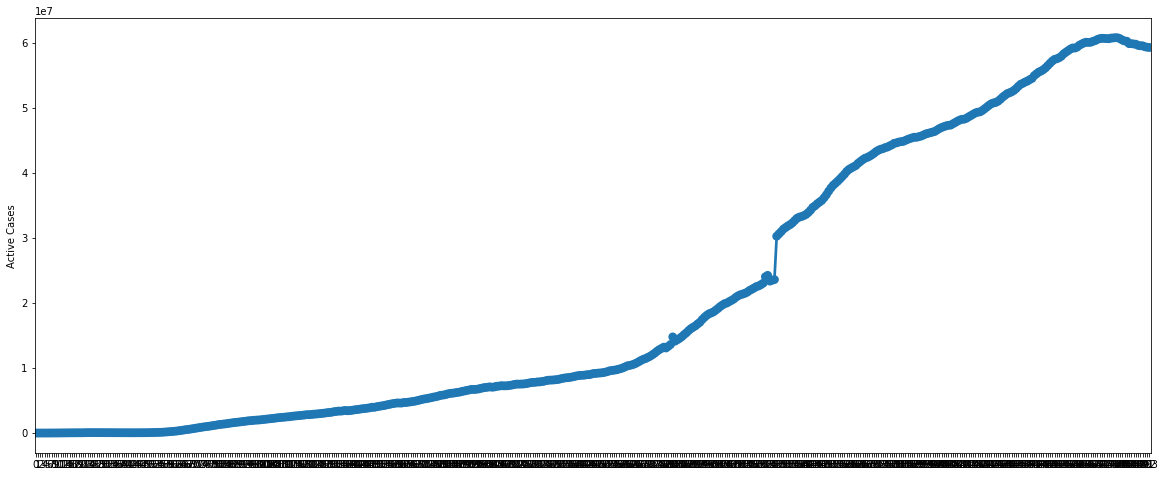

In [ ]:
#Using seaborn to plot the graph
plt.figure(figsize=(20,8))
sns.pointplot(x = total_active.index,y = total_active['Active Cases'])
plt.show()

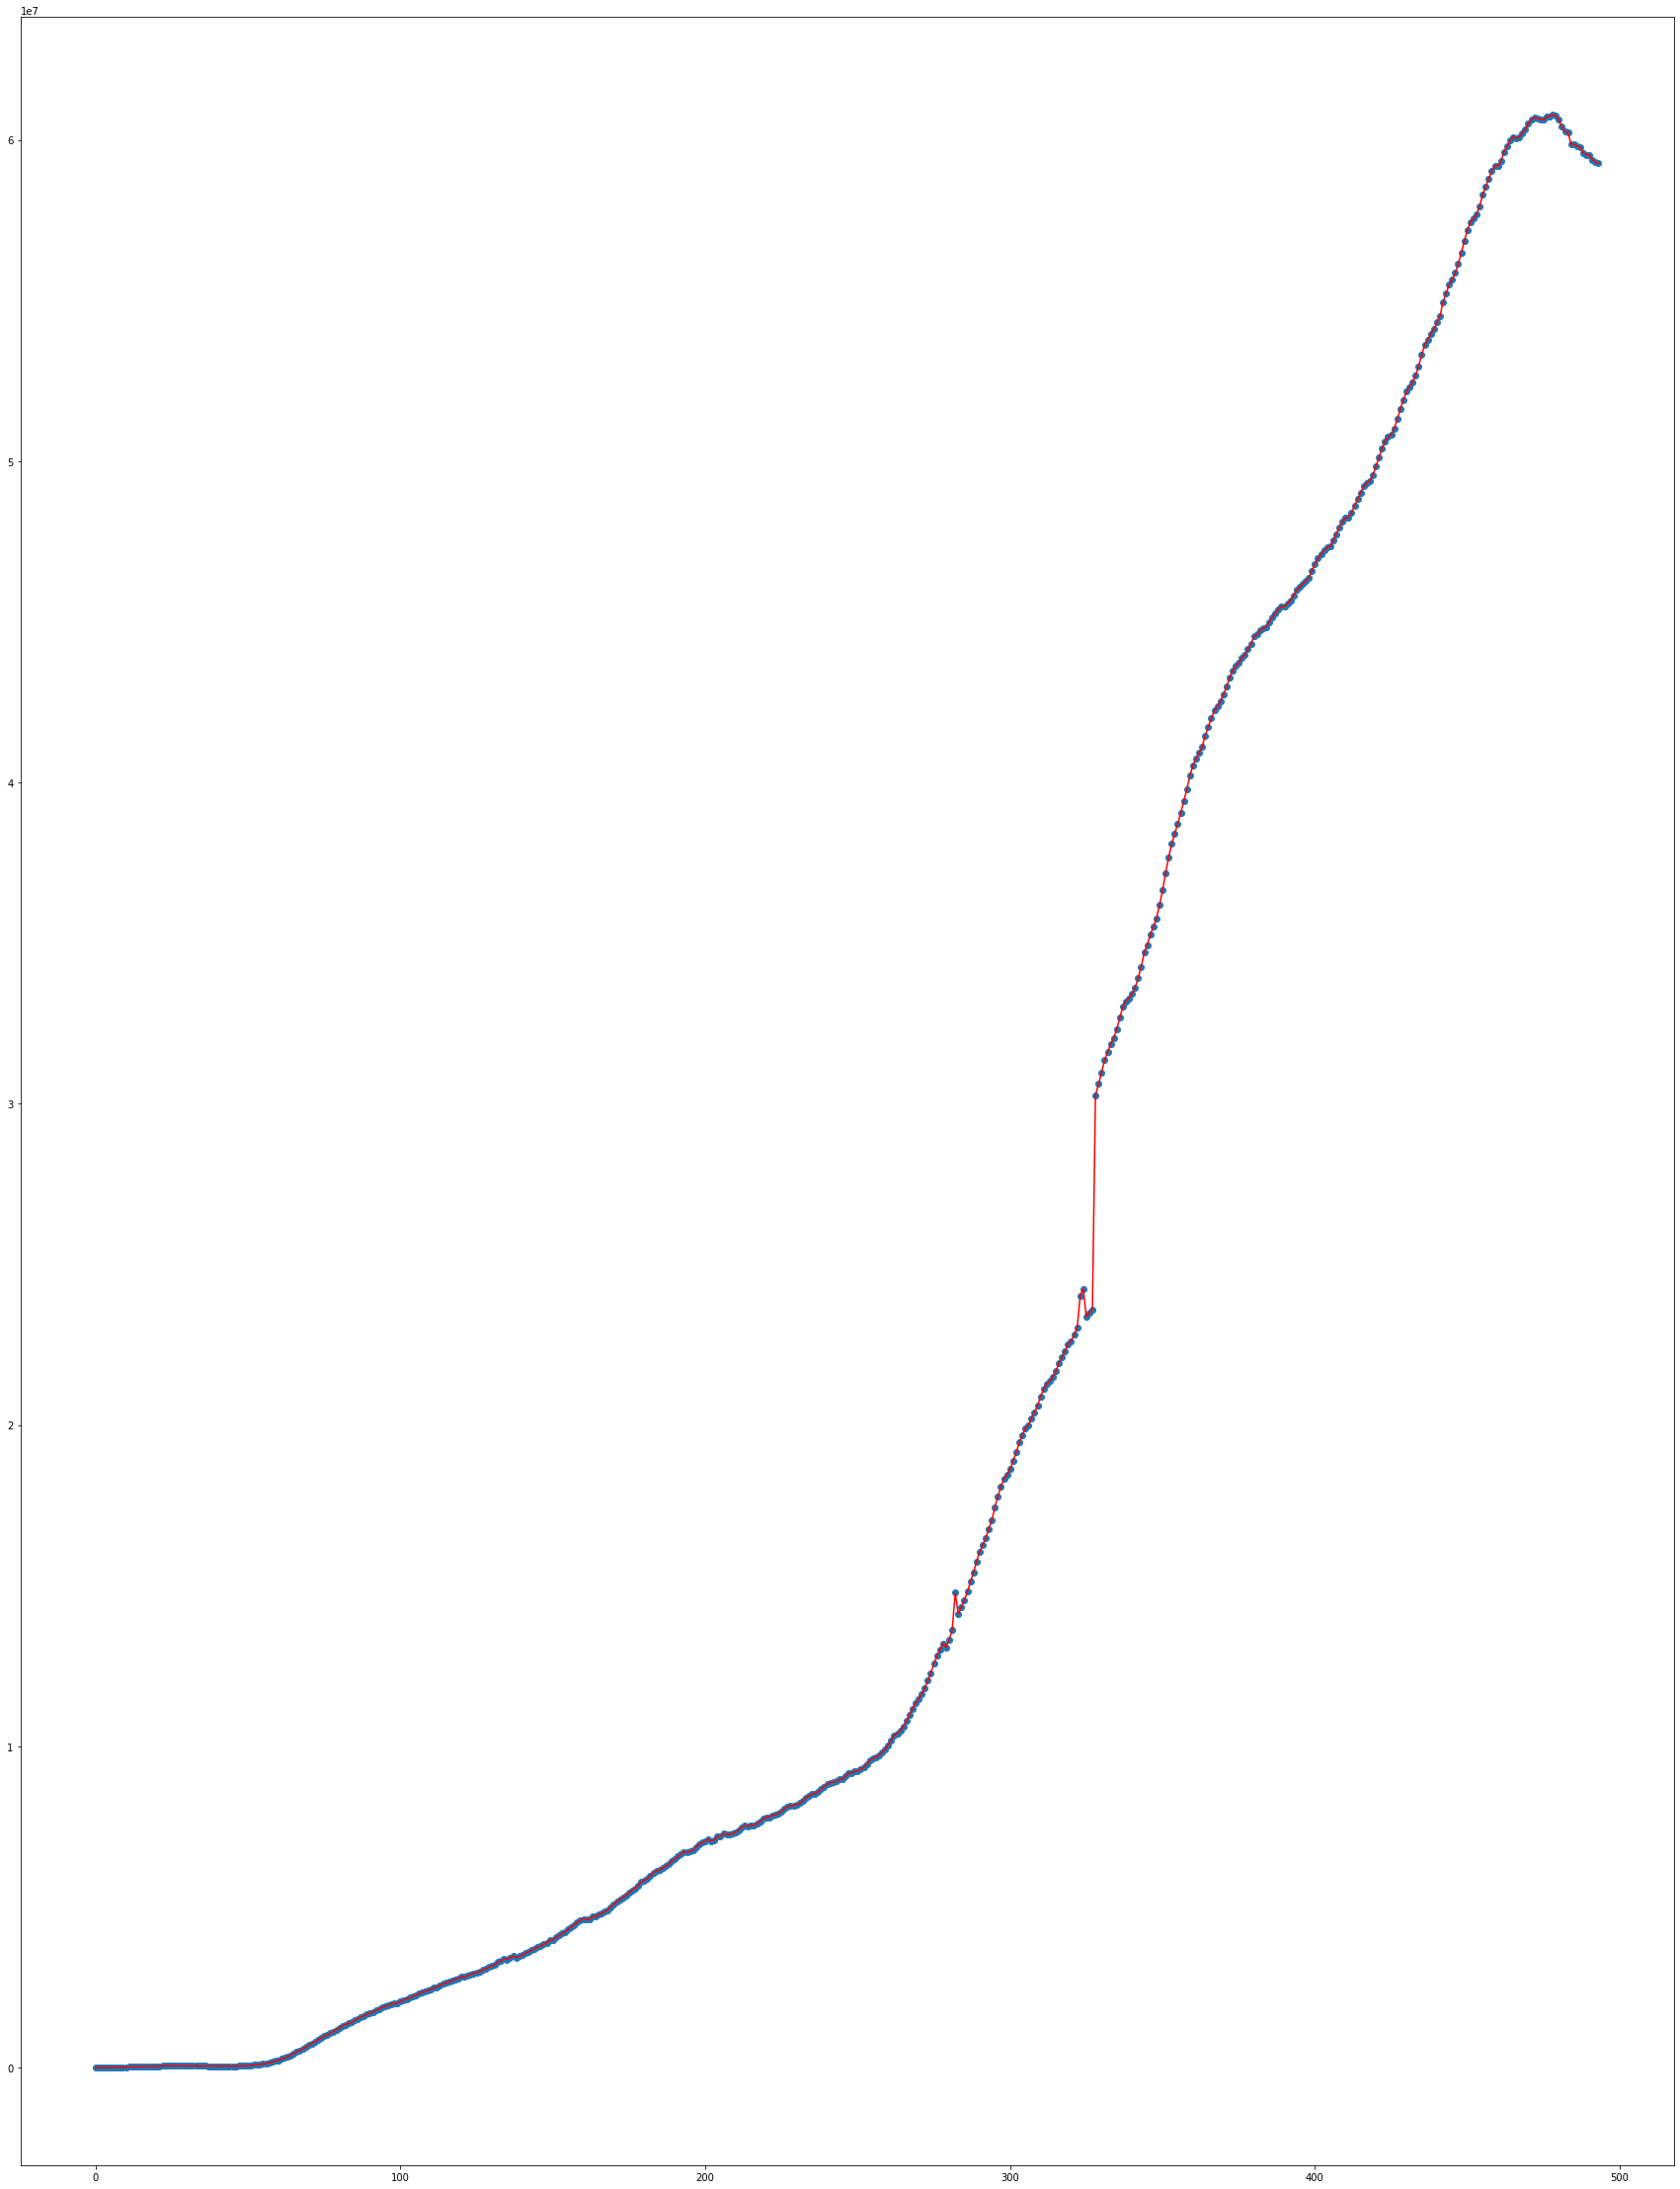

In [ ]:
plt.figure(figsize=(30,40))
plt.plot(total_active.index,total_active['Active Cases'],color='red')
plt.scatter(total_active.index,total_active['Active Cases'])
plt.show()

In [ ]:
total_cases = data.groupby("ObservationDate")['Active Cases','Confirmed','Deaths','Recovered'].sum().reset_index()
total_cases

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,ObservationDate,Active Cases,Confirmed,Deaths,Recovered
0,2020-01-22,510.0,557.0,17.0,30.0
1,2020-01-23,1003.0,1097.0,34.0,60.0
2,2020-01-24,876.0,941.0,26.0,39.0
3,2020-01-25,1353.0,1437.0,42.0,42.0
4,2020-01-26,2006.0,2118.0,56.0,56.0
...,...,...,...,...,...
489,2021-05-25,59537484.0,167848207.0,3485788.0,104824935.0
490,2021-05-26,59537131.0,168416423.0,3498544.0,105380748.0
491,2021-05-27,59381388.0,168970791.0,3511297.0,106078106.0
492,2021-05-28,59314539.0,169470725.0,3523117.0,106633069.0


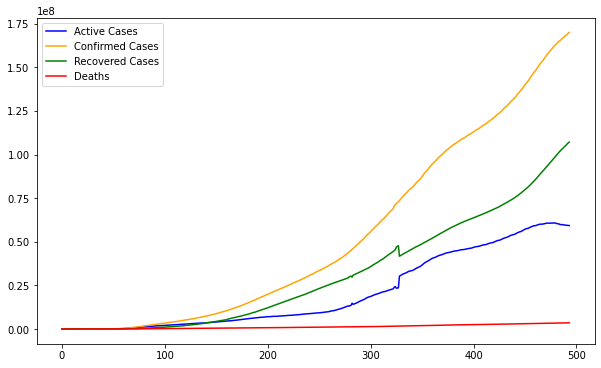

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(total_cases.index,total_cases['Active Cases'],color='blue',label='Active Cases')
plt.plot(total_cases.index,total_cases['Confirmed'],color='orange',label='Confirmed Cases')
plt.plot(total_cases.index,total_cases['Recovered'],color='green',label='Recovered Cases')
plt.plot(total_cases.index,total_cases['Deaths'],color='red',label='Deaths')
plt.legend()
plt.savefig("AllCases.png")
plt.show()

In [ ]:
#Plot in the form of bar graph
#Plot the recovery rate
top = latest_data.groupby('Country/Region')['Confirmed','Recovered'].sum().reset_index()
top.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country/Region,Confirmed,Recovered
0,Afghanistan,70111.0,57281.0
1,Albania,132297.0,129215.0
2,Algeria,128456.0,89419.0
3,Andorra,13693.0,13416.0
4,Angola,34180.0,27646.0


In [ ]:
top = top.sort_values("Confirmed",ascending=False)
top_20 = top.head(20)
top_20

,Country/Region,Confirmed,Recovered
182,US,33251939.0,0.0
78,India,27894800.0,25454320.0
23,Brazil,16471600.0,14496224.0
60,France,5719877.0,390878.0
180,Turkey,5235978.0,5094279.0
144,Russia,4995613.0,4616422.0
181,UK,4496823.0,15481.0
84,Italy,4213055.0,3845087.0
6,Argentina,3732263.0,3288467.0
64,Germany,3684672.0,3479700.0


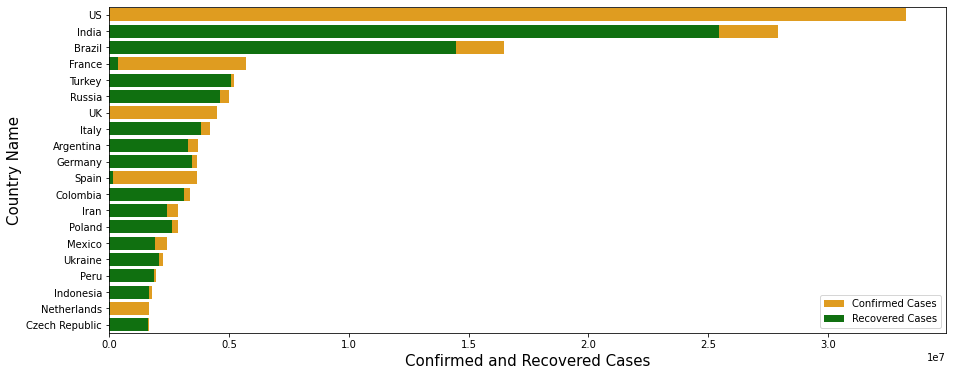

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=top_20['Confirmed'],y=top_20['Country/Region'],label='Confirmed Cases',color='orange')
sns.barplot(x=top_20['Recovered'],y=top_20['Country/Region'],label='Recovered Cases',color='green')
plt.xlabel("Confirmed and Recovered Cases",fontsize = 15)
plt.ylabel("Country Name",fontsize=15)
plt.legend()
plt.show()

In [ ]:
#India
data_india = data[data['Country/Region']=='India']
data_india

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active Cases
446,2020-01-30,NaN,India,1.0,0.0,0.0,1.0
509,2020-01-31,NaN,India,1.0,0.0,0.0,1.0
567,2020-02-01,NaN,India,1.0,0.0,0.0,1.0
629,2020-02-02,NaN,India,2.0,0.0,0.0,2.0
696,2020-02-03,NaN,India,3.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...
306351,2021-05-29,Tripura,India,50739.0,507.0,43190.0,7042.0
306366,2021-05-29,Unknown,India,0.0,0.0,0.0,0.0
306377,2021-05-29,Uttar Pradesh,India,1688152.0,20208.0,1621743.0,46201.0
306378,2021-05-29,Uttarakhand,India,327112.0,6360.0,289642.0,31110.0


In [ ]:
data_india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13182 entries, 446 to 306406
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationDate  13182 non-null  datetime64[ns]
 1   Province/State   13050 non-null  object        
 2   Country/Region   13182 non-null  object        
 3   Confirmed        13182 non-null  float64       
 4   Deaths           13182 non-null  float64       
 5   Recovered        13182 non-null  float64       
 6   Active Cases     13182 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 823.9+ KB


In [ ]:
data_india['Province/State'].value_counts()

Gujarat                                     354
Chandigarh                                  354
Jammu and Kashmir                           354
Uttar Pradesh                               354
Haryana                                     354
Andaman and Nicobar Islands                 354
Mizoram                                     354
Andhra Pradesh                              354
Unknown                                     354
Chhattisgarh                                354
Tripura                                     354
Tamil Nadu                                  354
Ladakh                                      354
Delhi                                       354
Odisha                                      354
Manipur                                     354
Madhya Pradesh                              354
Arunachal Pradesh                           354
Assam                                       354
Goa                                         354
Jharkhand                               

In [ ]:
#Checking data with Unknown Value
data_india[data_india['Province/State']=='Unknown'].tail(30)

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active Cases
230631,2021-02-19,Unknown,India,0.0,0.0,0.0,0.0
231396,2021-02-20,Unknown,India,0.0,0.0,0.0,0.0
232161,2021-02-21,Unknown,India,0.0,0.0,0.0,0.0
232926,2021-02-22,Unknown,India,0.0,0.0,0.0,0.0
233691,2021-02-23,Unknown,India,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
303306,2021-05-25,Unknown,India,0.0,0.0,0.0,0.0
304071,2021-05-26,Unknown,India,0.0,0.0,0.0,0.0
304836,2021-05-27,Unknown,India,0.0,0.0,0.0,0.0
305601,2021-05-28,Unknown,India,0.0,0.0,0.0,0.0


In [ ]:
data_india_1 = data_india[data_india['Province/State']!='Unknown']
data_india_1

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active Cases
446,2020-01-30,NaN,India,1.0,0.0,0.0,1.0
509,2020-01-31,NaN,India,1.0,0.0,0.0,1.0
567,2020-02-01,NaN,India,1.0,0.0,0.0,1.0
629,2020-02-02,NaN,India,2.0,0.0,0.0,2.0
696,2020-02-03,NaN,India,3.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...
306334,2021-05-29,Telangana,India,574026.0,3247.0,533862.0,36917.0
306351,2021-05-29,Tripura,India,50739.0,507.0,43190.0,7042.0
306377,2021-05-29,Uttar Pradesh,India,1688152.0,20208.0,1621743.0,46201.0
306378,2021-05-29,Uttarakhand,India,327112.0,6360.0,289642.0,31110.0


In [ ]:
#Grouping data by state
latest_data_india = data_india_1[data_india_1['ObservationDate']==data_india_1['ObservationDate'].max()]
latest_data_india

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active Cases
305855,2021-05-29,Andaman and Nicobar Islands,India,6964.0,113.0,6660.0,191.0
305856,2021-05-29,Andhra Pradesh,India,1671742.0,10738.0,1487382.0,173622.0
305873,2021-05-29,Arunachal Pradesh,India,26778.0,114.0,22746.0,3918.0
305874,2021-05-29,Assam,India,403623.0,3245.0,344083.0,56295.0
305896,2021-05-29,Bihar,India,704173.0,5052.0,678036.0,21085.0
305930,2021-05-29,Chandigarh,India,59740.0,740.0,56534.0,2466.0
305937,2021-05-29,Chhattisgarh,India,967645.0,12979.0,911752.0,42914.0
305956,2021-05-29,Dadra and Nagar Haveli and Daman and Diu,India,10214.0,4.0,9877.0,333.0
305960,2021-05-29,Delhi,India,1424646.0,24073.0,1387538.0,13035.0
305996,2021-05-29,Goa,India,154419.0,2597.0,136766.0,15056.0


In [ ]:
states = latest_data_india.groupby('Province/State')['Confirmed','Recovered','Deaths','Active Cases'].sum().reset_index()
states.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Province/State,Confirmed,Recovered,Deaths,Active Cases
0,Andaman and Nicobar Islands,6964.0,6660.0,113.0,191.0
1,Andhra Pradesh,1671742.0,1487382.0,10738.0,173622.0
2,Arunachal Pradesh,26778.0,22746.0,114.0,3918.0
3,Assam,403623.0,344083.0,3245.0,56295.0
4,Bihar,704173.0,678036.0,5052.0,21085.0


In [ ]:
top_india = states.sort_values("Confirmed",ascending=False)
top_india

,Province/State,Confirmed,Recovered,Deaths,Active Cases
20,Maharashtra,5713215.0,5339838.0,94030.0,279347.0
15,Karnataka,2567449.0,2189064.0,28298.0,350087.0
16,Kerala,2494385.0,2252505.0,8455.0,233425.0
30,Tamil Nadu,2039716.0,1706298.0,23261.0,310157.0
33,Uttar Pradesh,1688152.0,1621743.0,20208.0,46201.0
1,Andhra Pradesh,1671742.0,1487382.0,10738.0,173622.0
8,Delhi,1424646.0,1387538.0,24073.0,13035.0
35,West Bengal,1354956.0,1237290.0,15268.0,102398.0
6,Chhattisgarh,967645.0,911752.0,12979.0,42914.0
28,Rajasthan,936162.0,871283.0,8251.0,56628.0


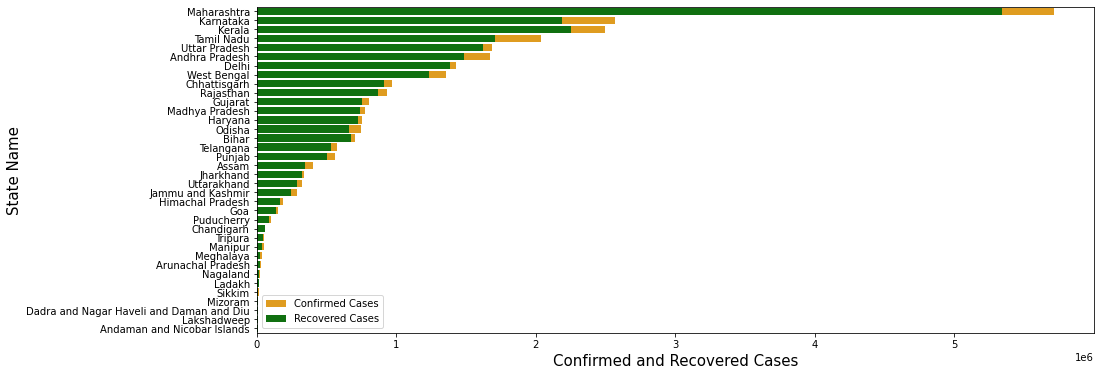

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=top_india['Confirmed'],y=top_india['Province/State'],label='Confirmed Cases',color='orange')
sns.barplot(x=top_india['Recovered'],y=top_india['Province/State'],label='Recovered Cases',color='green')
plt.xlabel("Confirmed and Recovered Cases",fontsize = 15)
plt.ylabel("State Name",fontsize=15)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 Countries having most active cases",fontsize=30)
ax = sns.barplot(x=top_actives.active,y=top_actives.country)
for i,(value,name) in enumerate(zip(top_actives.active,top_actives.country)):
    ax.text(value,i-0.05,f'{value:,.0f}',size=10,ha='left',va='center')
ax.set(xlabel="Total Cases",ylabel="Country")]